# Lecture10. RNN
---

## 1. RNN이란?
#### ◾️ Vanilla Neural Network - one to one

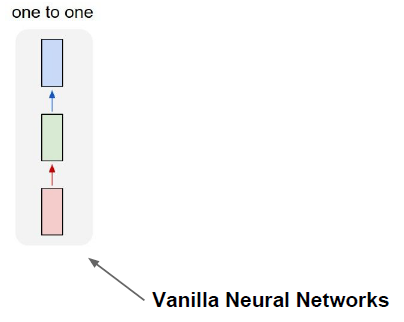

* 지금까지 배운 아키텍처의 모양  
* 이미지 또는 벡터를 input으로 받고, hidden layer를 거쳐서 하나의 출력을 내보냄  

#### ◾️ RNN(Recurrent Neural Networks)

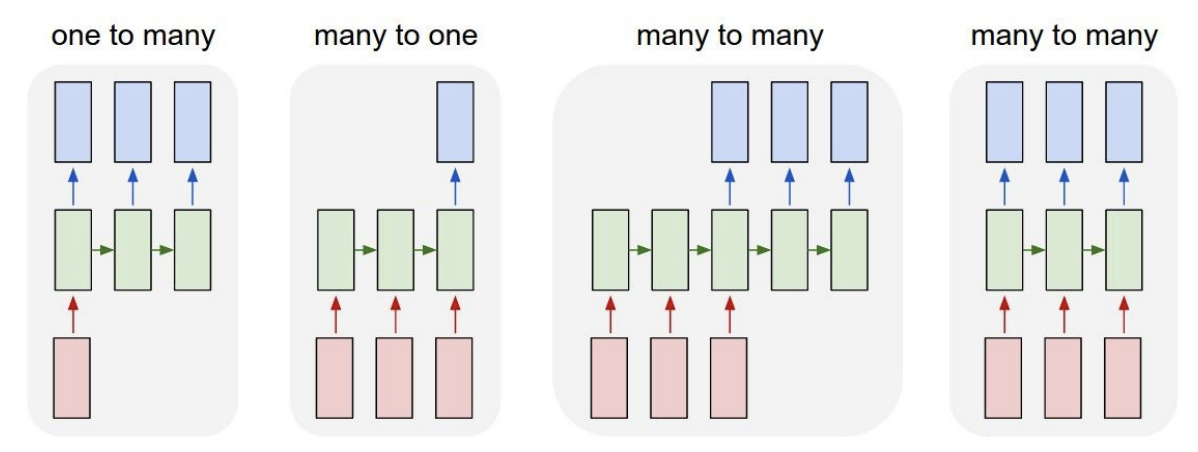

* RNN은 가변 길이의 입/출력(데이터)을 다루기 위해 필요한 방법
* RNN은 작은 "Recurrent Core Cell"를 가지고 있음  
* RNN은 내부에 hidden state를 가지고 있음  
* hidden state는 새로운 입력이 들어올 때마다 매번 업데이트 됨  
  1. RNN이 입력을 받는다.  
  2. 모든 스텝마다 'Hidden state'를 업데이트한다.
  3. 출력값을 내보낸다.  
  
◽️ one to many: Image Captioning  
◽️ many to one: Sentiment Classification  
◽️ many to many: Machine Translation/Video classification on frame level  

#### ◾️ RNN의 구조  

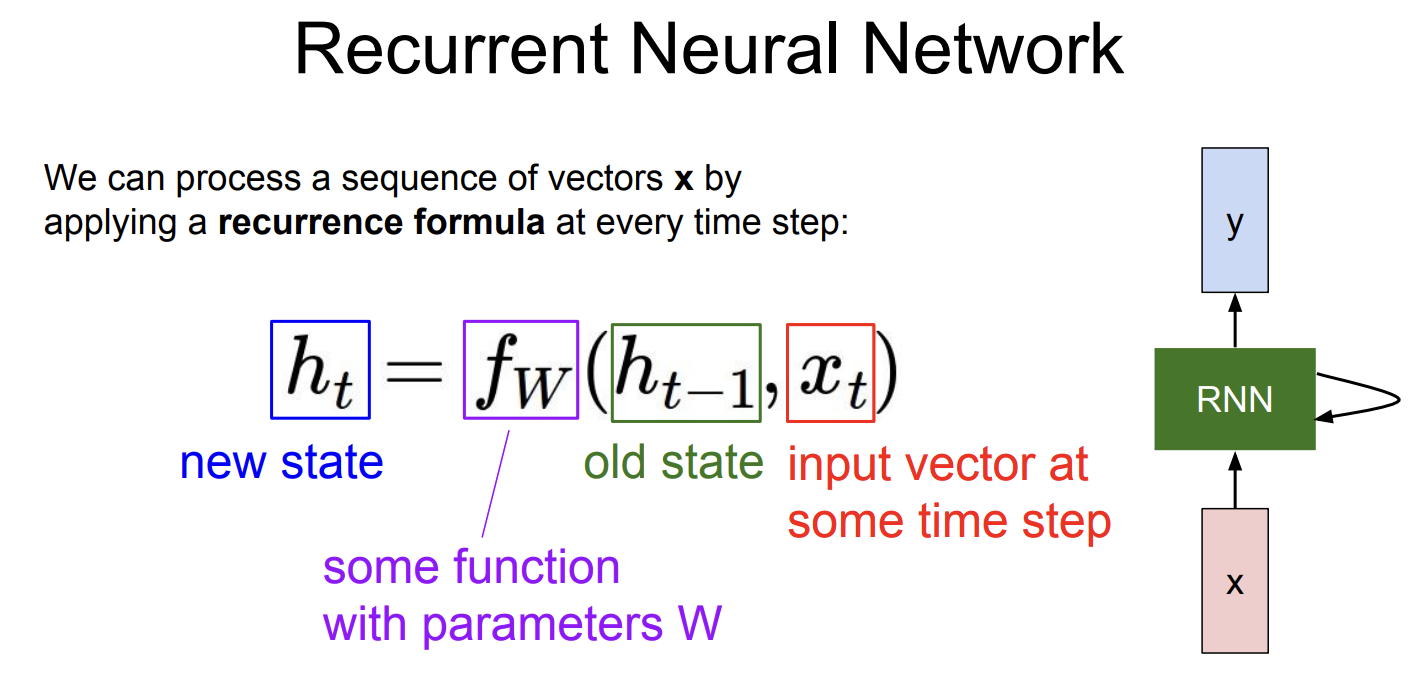

* 매 스텝마다 x_t가 들어오고 기존의 h_t-1를 입력으로 받아 h_t를 업데이트  
* h_t는 f의 출력으로 다음 상태의 hidden state  
* f의 인풋은 이전 상태의 hidden state인 h_t-1과 현재 상태의 입력상태인 x_t  
* 다음 단계에서는 h_t와 x_t+1이 f의 인풋이 됨  
* RNN에서 출력 값을 가지려면 h_t를 입력으로 하는 FC-layer를 추가해야 함  
* **이때 f와 w는 매 스텝마다 동일함**  

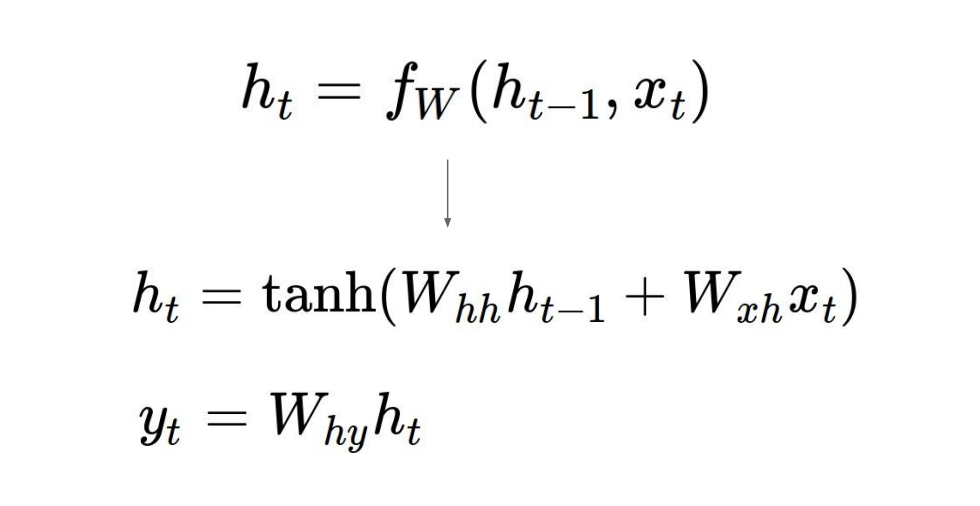

* 이때 tanh는 비선형성을 구현하기 위해 사용됨  
* RNN이 hidden state를 가지며 이를 재귀적으로 feedback함  
  
#### ◾️ RNN의 computational graph  

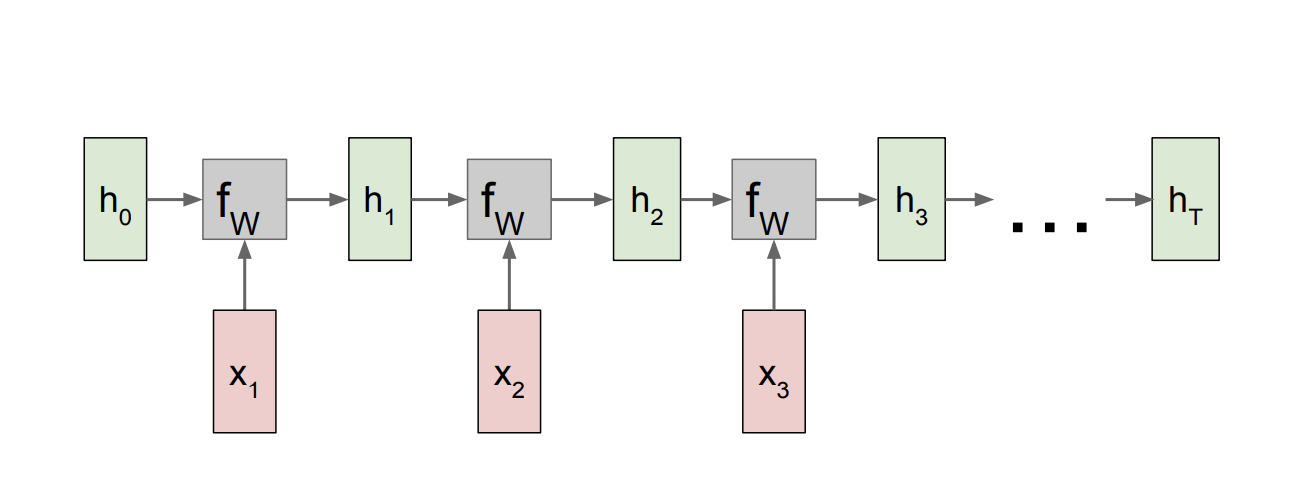

* 첫 스텝에서 initial hidden state인 h_0은 보통 0으로 초기화  
* 출력인 h_1이 다시 입력으로 들어가서 이 과정이 재귀적으로 반복됨  

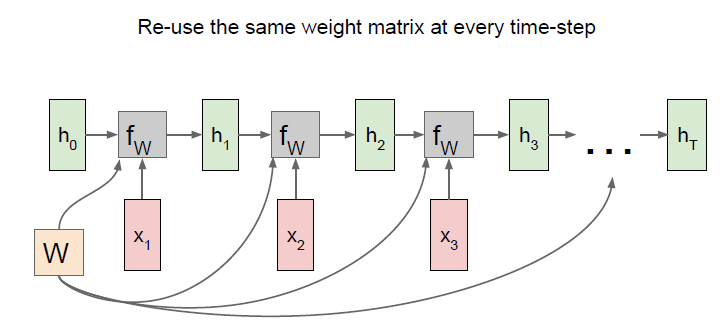

* 똑같은 set의 파라미터를 가지고 업데이트함  
* 동일한 가중치 행렬이 매번 사용됨  

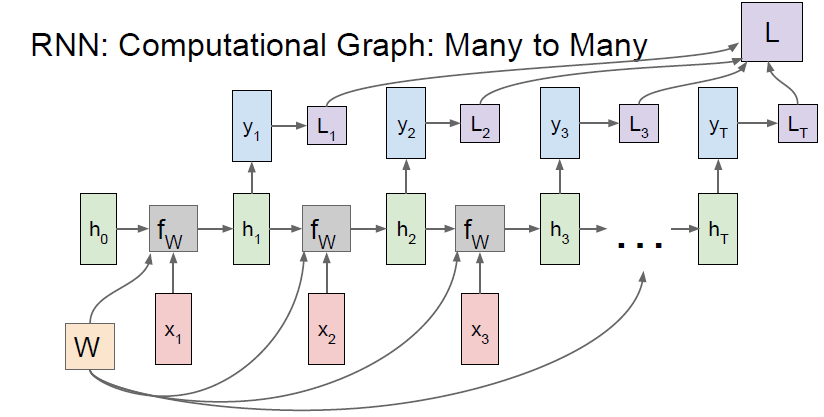

* 각 스텝마다 개별적으로 y_t에 대한 loss를 계산할 수 있음  
* RNN의 최종 loss는 각 개별 loss들의 합임  

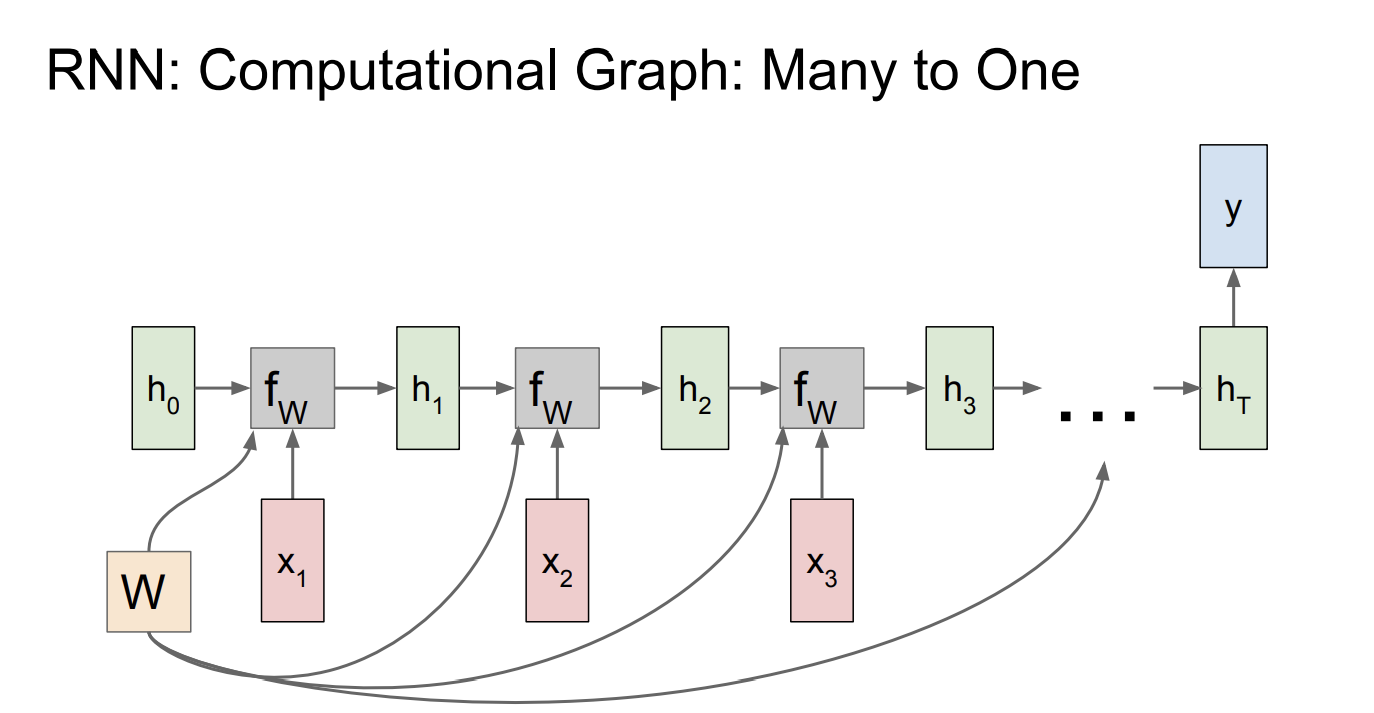

* 최종 hidden state에서만 출력 값을 가짐

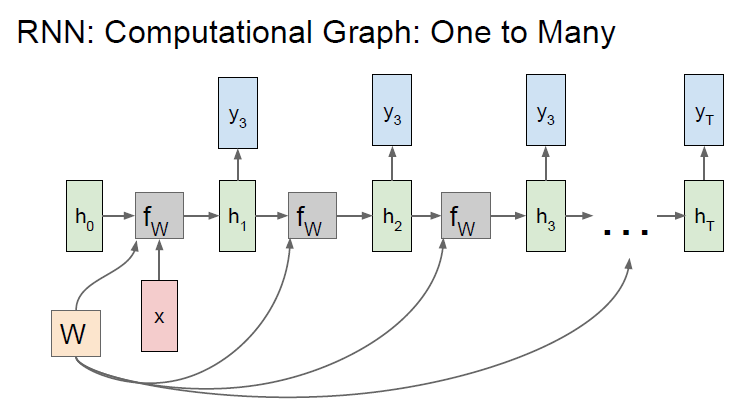

* 고정입력을 맏지만 가변출력인 경우  
* 고정입력인 x는 모델의 initial hidden state를 초기화시키는 용도로 사용  
* 모든 스텝에서 출력 값을 가짐  

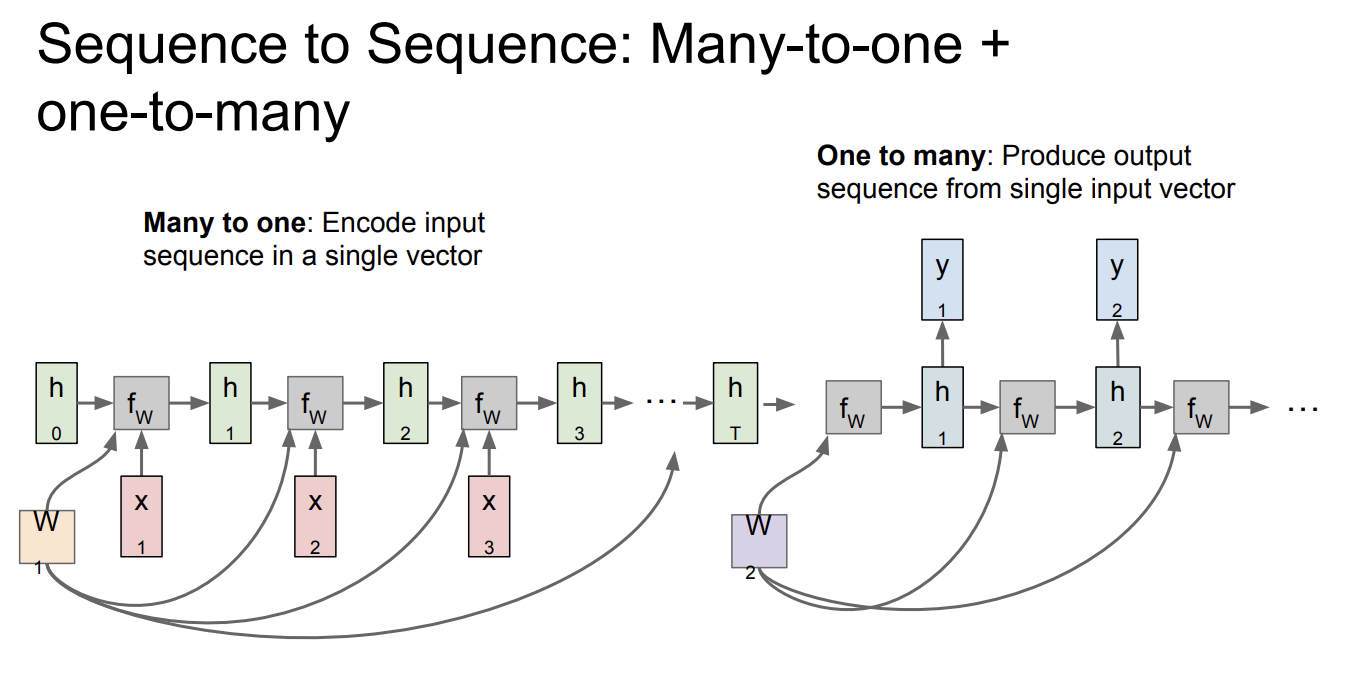

* machine translation에 사용할 수 있는 모델  
* 가변입력과 가변출력을 가짐  
* many to one과 one to many의 결합으로 볼 수 있음  
* many to one: encoder로서 가변입력을 받음. 가변 입력을 하나의 벡터로 요약함  
* one to many: decoder로서 앞에서 요약한 하나의 벡터에 대해 가변출력을 내보냄  

#### ◾️ Character-level Language Model  
* 문자열 시퀀스를 입력으로 받아서 다음 문자를 예측하는 모델  
* RNN은 대개 language modeling에서 자주 사용됨  

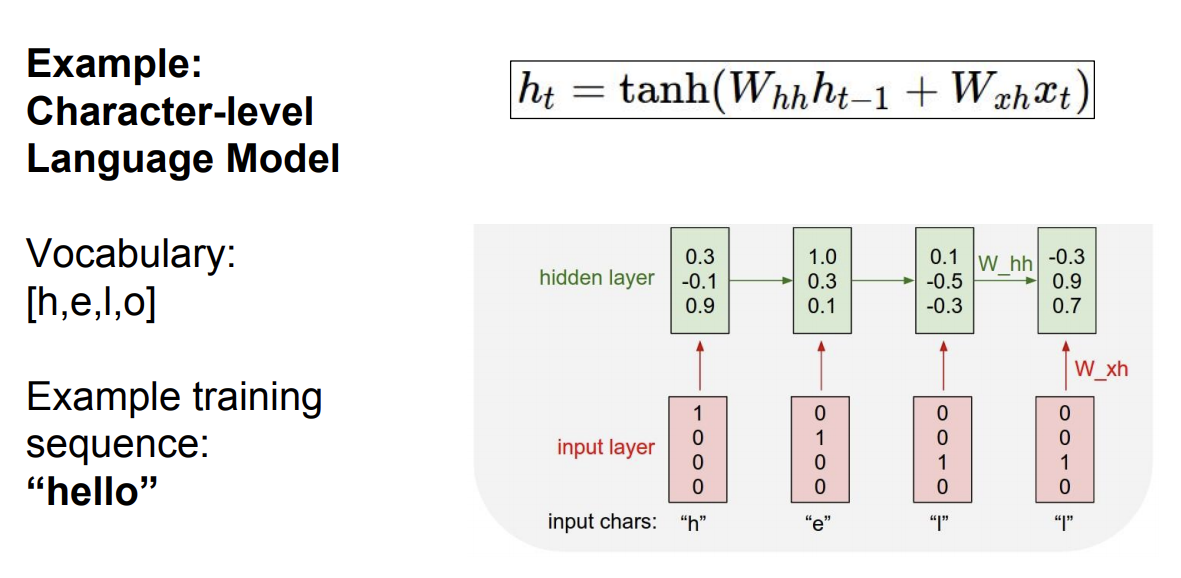

* h, e, l, o라는 문자들이 있고, 문자열 "hello"를 만들고 싶다고 하자  
* input 문자들을 벡터로 만든 다음 함수식을 이용해서 hidden layer의 값을 구함  

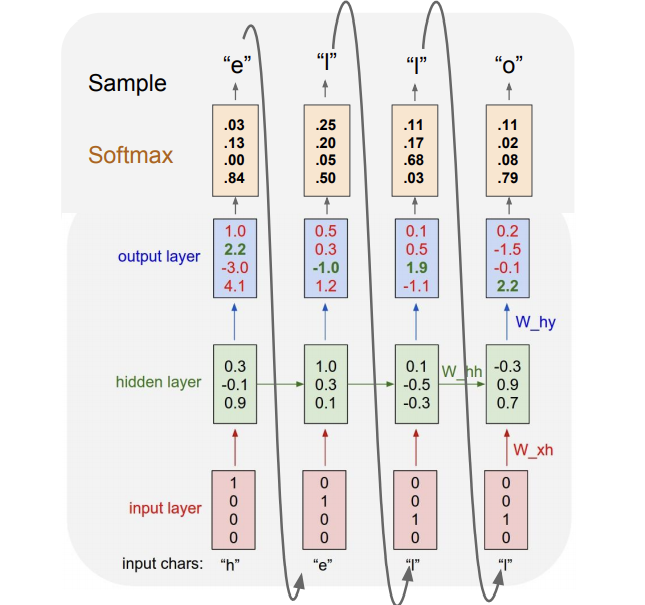

* 스코어를 확률 분포로 표현하기 위해 softmax함수를 사용함  
* 인풋에 문자 "h"가 주어지면 output layer에서 모든 문자(h, e, l, o)에 대한 스코어를 얻을 수 있음  
* test-time에 이 스코어를 sampling하여 다음 문자 선택에 이용  


#### ◾️ Backpropagation through time
* 위의 모델을 train시키려면 하나의 출력값을 알기 위해서 모든 loss 값들을 알아야 함  
* 연산량이 엄청 많아짐  

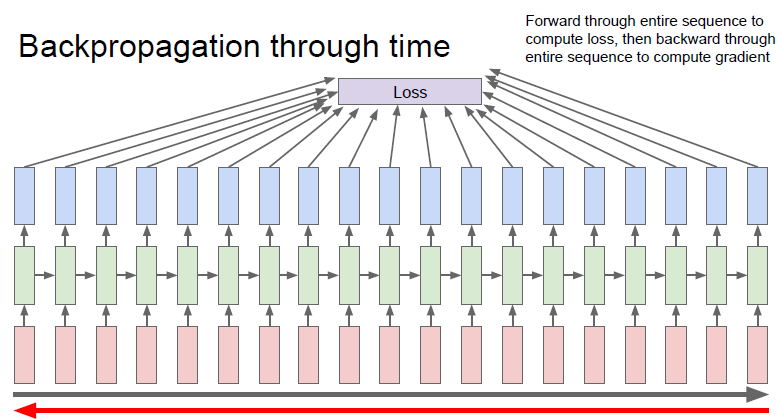

#### ◾️ Truncated Backpropagation through time
* 실제로는 Truncated Backpropagation through time을 통해서 backprob을 근사시키는 방법을 이용함  
* train할 때 한 스텝을 일정한 단위로 나눈 후 서브시퀀스의 loss들만 계산함  

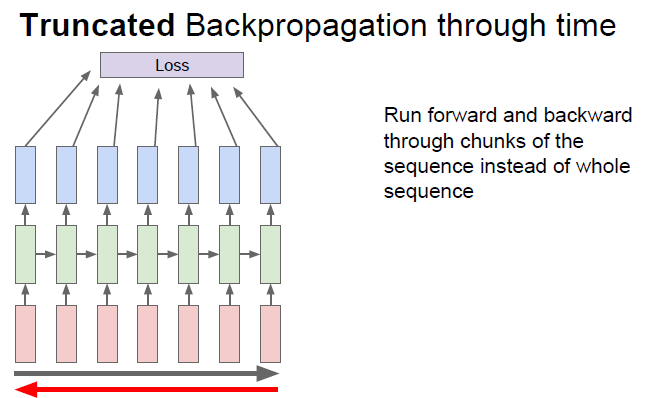

## 2. Image Captioning
* CNN과 RNN을 혼합한 대표적인 방법  
* Image captioning 모델의 입력은 이미지이고, 출력은 자연어로 된 caption  

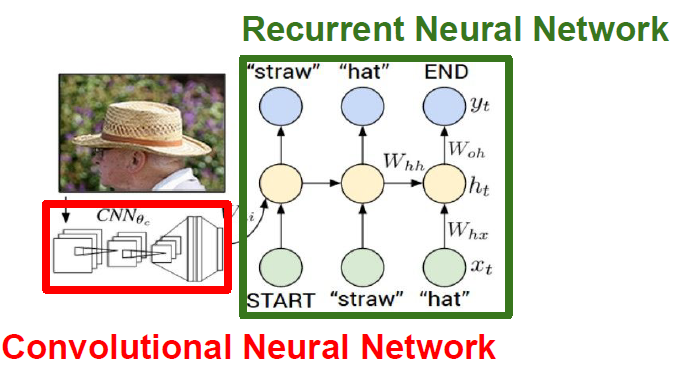

* CNN에서 입력 이미지를 받아 요약된 이미지 정보가 있는 vector를 출력  
* CNN의 벡터는 RNN의 초기 step의 입력으로 들어감  
* RNN에서는 caption에 사용할 문자들을 만들어냄  

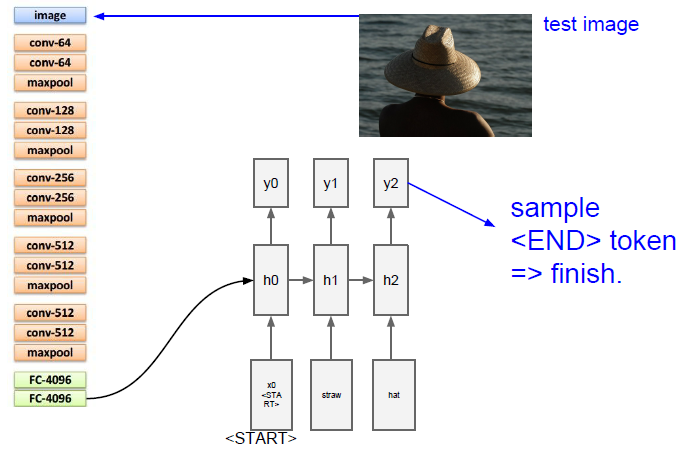

* 마지막에 END라는 토큰으로 문장의 끝을 알려줌  
* END가 샘플링되면 모델은 더이상 단어를 생성하지 않고 이미지에 대한 caption이 완성됨  
* 이 모델은 supervised learning으로 학습시킴  

#### ◾️ Image captioning with Attention
* caption을 생성할 때 이미지의 다양한 부분에 더 집중  

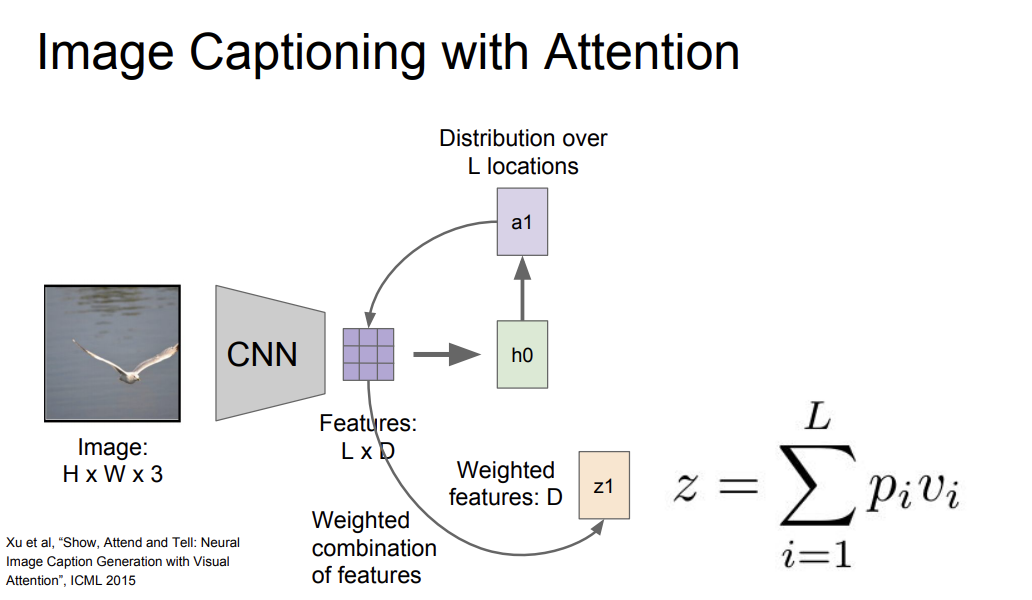

* 모델이 이미지에서 보고싶은 위치에 대한 분포를 만들어냄 -> 이는 train time에 모델이 어느 위치를 봐야하는지에 대한 attention  
* 첫번째 hidden state인 h_0은 이미지의 위치에 대한 분포를 계산(a1)  
* a1을 다시 벡터 집합과 연산하여 이미지 attention(z1)을 만들어냄  

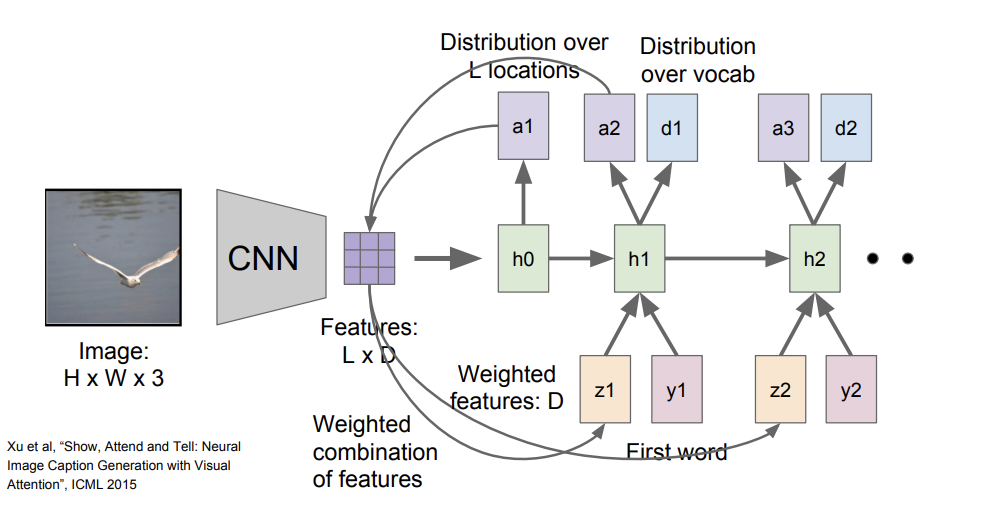

* z1은 다시 다음 스텝의 입력으로 들어감  
* 다음 스텝부터는 단어들의 분포인 d_t까지 두 개의 출력이 생성됨  
* 결과를 보면, 모델이 caption을 생성할 때 더 의미있는 부분에 attention을 집중하는 것을 알 수 있음  
* RNN + Attention 조합은 image captioning 뿐만 아니라 Visual Question Answering(VQA)에서도 사용됨  

## 3. LSTM

* 하지만 일반적인 RNN은 잘 사용하지 않음
* backward pass에서 gradient를 계산할 때의 문제점이 있는데...  

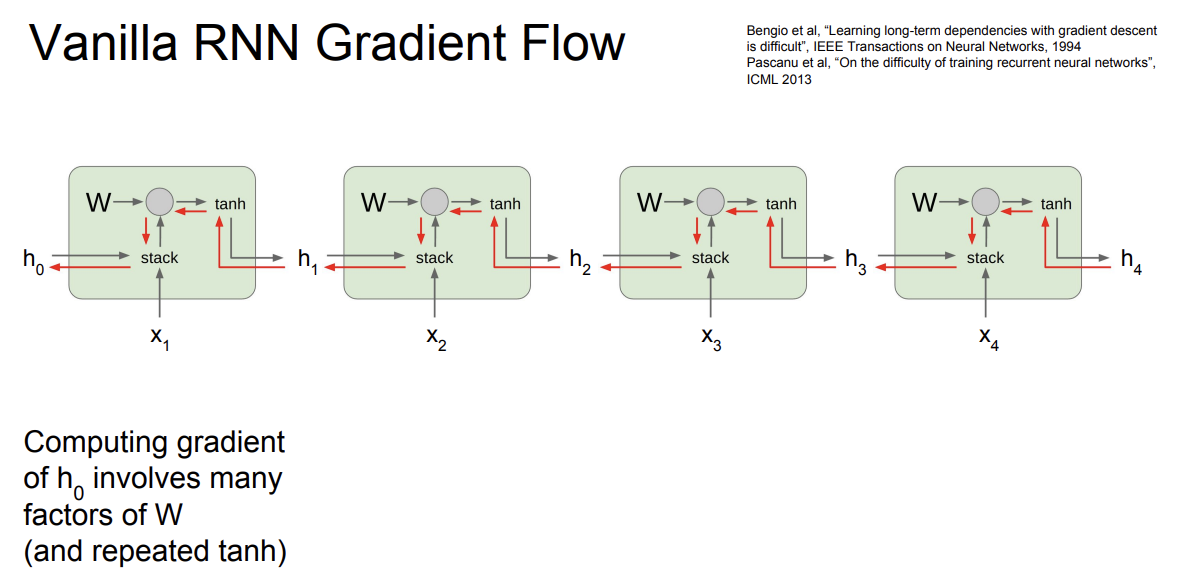

* 매번 RNN cell을 통과할 때마다 가중치 행렬을 곱하게 됨  
* h_0의 gradient를 구하려면 모든 RNN cell을 거쳐야됨  

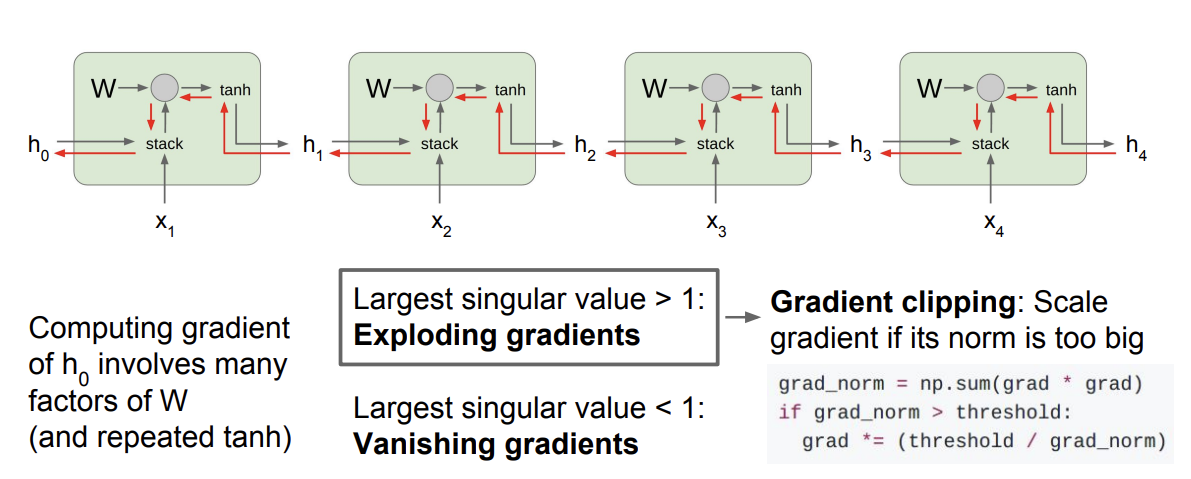

* exploding gradient는 Gradient clipping 기법을 사용하여 해결함  
* gradient의 L2 norm이 임계값보다 큰 경우 gradient가 최대 임계값을 넘지 못하도록 조정해줌  
* vanishing gradient의 문제는 조금 더 복잡한 RNN 아키텍처를 도입해서 해결해야 함 -> **LSTM**

#### ◾️ LSTM
* Long Short Term Memory로 RNN의 vanishing gradient와 exploding gradients의 문제를 해결하기 위해 디자인됨  

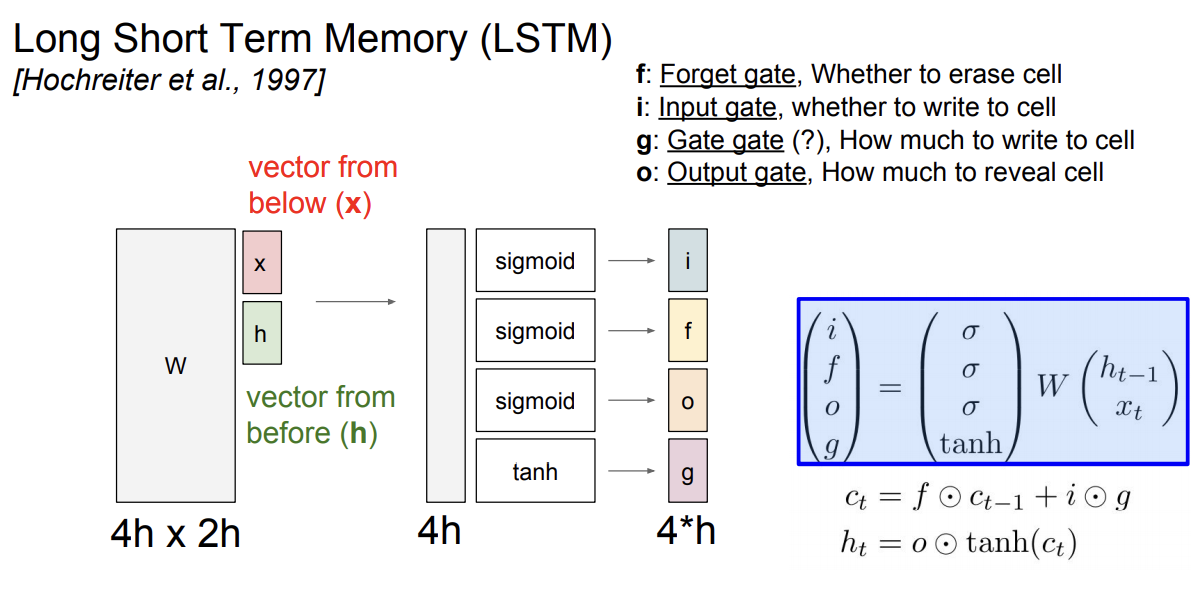

* 한 셀당 2개의 hidden state가 있음  
* 각 gate마다 사용하는 non linearity가 다름  
* 2개의 값을 입력으로 받고 쌓은 다음 4개의 gates를 계산하기 위해 가중치 행렬을 곱해줌  
* 각 gate의 출력은 hidden state의 크기와 동일  